<a href="https://colab.research.google.com/github/huang-shao-tian/ml_tutorials_handson/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

## **Preprocessing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### import the dataset

In [2]:
dataset = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
y = dataset['MEDV']
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [6]:
X = dataset.drop(['MEDV'], axis=1)
print(X)

        CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

### split the dataset into training and test sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

## **Model Training**

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
regressor.intercept_

37.93710774183365

In [11]:
regressor.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

## **Prediction**






In [12]:
y_pred = regressor.predict(X_test)

In [13]:
y_pred

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [14]:
# prompt: 予測したyの値と実際のyの値を比較しやすい形で出力する
comparison_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(comparison_df)

     Predicted  Actual
329  24.935708    22.6
371  23.751632    50.0
219  29.326383    23.0
403  11.975346     8.3
78   21.372725    21.2
..         ...     ...
4    27.811077    36.2
428  14.506816    11.0
385   7.573699     7.2
308  28.334807    22.8
5    25.043412    28.7

[152 rows x 2 columns]


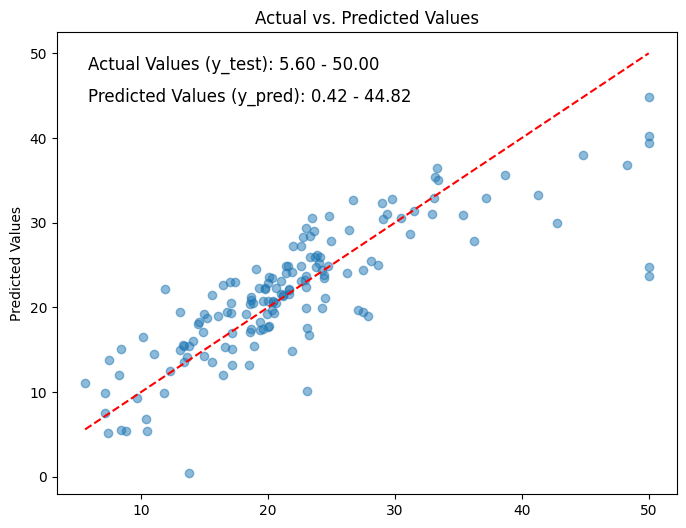

In [24]:
# prompt: prompt: 予測値と実際値の違いをわかりやすいグラフを生成する
# Y軸のみラベルをつける
# グラフの左上にY軸における２つの変数を説明

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line to represent perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

# Add the Y-axis labels in the top left corner
plt.text(0.05, 0.95, f'Actual Values (y_test): {y_test.min():.2f} - {y_test.max():.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.88, f'Predicted Values (y_pred): {y_pred.min():.2f} - {y_pred.max():.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


plt.show()


## **Model Performance Evaluating**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
r2_score(y_test, y_pred)

0.6733825506400177

In [ ]:
mean_absolute_error(y_test,y_pred)

3.6099040603818238

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.18118047288424102

In [ ]:
mean_squared_error(y_test,y_pred)

27.195965766883354